In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [89]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [90]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [91]:
data['fnlwgt'].value_counts(normalize=True)

203488    0.000430
190290    0.000389
120277    0.000389
125892    0.000369
126569    0.000369
126675    0.000348
113364    0.000348
99185     0.000348
186934    0.000328
111567    0.000328
120131    0.000307
127651    0.000307
123011    0.000307
117963    0.000307
193882    0.000287
194630    0.000287
123983    0.000287
108140    0.000287
132879    0.000287
188246    0.000287
111483    0.000287
121124    0.000287
148995    0.000287
164190    0.000287
136986    0.000287
216129    0.000266
117789    0.000266
144949    0.000266
155489    0.000266
156464    0.000266
            ...   
379242    0.000020
262515    0.000020
340341    0.000020
37331     0.000020
205175    0.000020
88440     0.000020
307589    0.000020
371827    0.000020
196947    0.000020
57679     0.000020
186696    0.000020
303431    0.000020
69905     0.000020
209173    0.000020
141590    0.000020
284952    0.000020
170272    0.000020
137444    0.000020
108838    0.000020
106791    0.000020
111368    0.000020
391468    0.

### LogisticRegression

In [92]:
df = pd.get_dummies( data, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'] )

In [93]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=109)

In [94]:
df = df.drop(['capital-gain', 'capital-loss'], axis=1)

In [95]:
df.loc[:,['income']] = df[['income']].replace({"<=50K": 0, ">50K": 1})

In [96]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week', 'income',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=107)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 107 entries, age to native-country_Yugoslavia
dtypes: int64(5), uint8(102)
memory usage: 6.6 MB


In [98]:
df_trn, df_tst, y_trn, y_tst = train_test_split(df.drop(['income'], axis=1), df[['income']], test_size=0.3, random_state=42)

In [99]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( df_trn, y_trn )
pred1 = model1.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( df_trn, y_trn )
pred2 = model1.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( df_trn, y_trn )
pred3 = model3.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
lr_fpr1, lr_tpr1, lr_thres1 = roc_curve( y_tst, pred1[:, 1] )
lr_fpr2, lr_tpr2, lr_thres2 = roc_curve( y_tst, pred2[:, 1] )
lr_fpr3, lr_tpr3, lr_thres3 = roc_curve( y_tst, pred3[:, 1] )

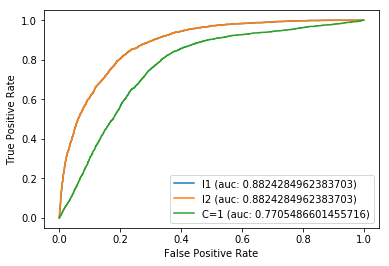

In [103]:
lr_r1 = roc_auc_score( y_tst, pred1[:, 1] )
lr_r2 = roc_auc_score( y_tst, pred2[:, 1] )
lr_r3 = roc_auc_score( y_tst, pred3[:, 1] )
plt.plot( lr_fpr1, lr_tpr1, label = 'l1 (auc: '+str(lr_r1)+')' )
plt.plot( lr_fpr2, lr_tpr2, label = 'l2 (auc: '+str(lr_r2)+')' )
plt.plot( lr_fpr3, lr_tpr3, label = 'C=1 (auc: '+str(lr_r3)+')' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### KNeighborsClassifier

In [104]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights = 'distance' )
knn1.fit(df_trn, y_trn)
pred1 = knn1.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [105]:
knn2 = KNeighborsClassifier(n_neighbors=3, weights = 'distance' )
knn2.fit(df_trn, y_trn)
pred2 = knn2.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [106]:
knn3 = KNeighborsClassifier(n_neighbors=5, weights = 'distance' )
knn3.fit(df_trn, y_trn)
pred3 = knn3.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [107]:
knn4 = KNeighborsClassifier(n_neighbors=7, weights = 'distance' )
knn4.fit(df_trn, y_trn)
pred4 = knn4.predict_proba( df_tst )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [108]:
kn_fpr1, kn_tpr1, kn_thres1 = roc_curve( y_tst, pred1[:, 1] )
kn_fpr2, kn_tpr2, kn_thres2 = roc_curve( y_tst, pred2[:, 1] )
kn_fpr3, kn_tpr3, kn_thres3 = roc_curve( y_tst, pred3[:, 1] )
kn_fpr4, kn_tpr4, kn_thres4 = roc_curve( y_tst, pred4[:, 1] )

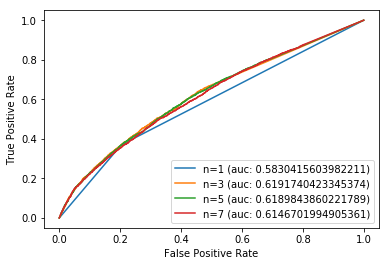

In [109]:
kn_r1 = roc_auc_score( y_tst, pred1[:, 1] )
kn_r2 = roc_auc_score( y_tst, pred2[:, 1] )
kn_r3 = roc_auc_score( y_tst, pred3[:, 1] )
kn_r4 = roc_auc_score( y_tst, pred4[:, 1] )
plt.plot( kn_fpr1, kn_tpr1, label = 'n=1 (auc: '+str(kn_r1)+')' )
plt.plot( kn_fpr2, kn_tpr2, label = 'n=3 (auc: '+str(kn_r2)+')' )
plt.plot( kn_fpr3, kn_tpr3, label = 'n=5 (auc: '+str(kn_r3)+')' )
plt.plot( kn_fpr4, kn_tpr4, label = 'n=7 (auc: '+str(kn_r4)+')' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### DecisionTreeClassifier

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
df = data.drop(['capital-gain', 'capital-loss'], axis=1)

In [112]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [113]:
df1 = df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']].apply(LabelEncoder().fit_transform)

In [114]:
df1.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,4,1,4,7,3,2,1,39,0
1,4,11,2,5,0,4,1,39,0
2,2,7,2,11,0,4,1,39,1
3,4,15,2,7,0,2,1,39,1
4,0,15,4,0,3,4,0,39,0


In [115]:
df2 = df.drop(['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income'], axis=1).join(df1)

In [116]:
df2.head()

,age,fnlwgt,educational-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,40,4,1,4,7,3,2,1,39,0
1,38,89814,9,50,4,11,2,5,0,4,1,39,0
2,28,336951,12,40,2,7,2,11,0,4,1,39,1
3,44,160323,10,40,4,15,2,7,0,2,1,39,1
4,18,103497,10,30,0,15,4,0,3,4,0,39,0


In [117]:
df_trn, df_tst, y_trn, y_tst = train_test_split(df2.drop(['income'], axis=1), df2[['income']], test_size=0.3, random_state=42)

In [118]:
dss1 = DecisionTreeClassifier(max_depth=2)
dss1.fit(df_trn, y_trn)
pred1 = dss1.predict_proba( df_tst )

In [119]:
dss2 = DecisionTreeClassifier(max_depth=3)
dss2.fit(df_trn, y_trn)
pred2 = dss2.predict_proba( df_tst )

In [120]:
dss3 = DecisionTreeClassifier(max_depth=4)
dss3.fit(df_trn, y_trn)
pred3 = dss3.predict_proba( df_tst )

In [121]:
dss4 = DecisionTreeClassifier(max_depth=5)
dss4.fit(df_trn, y_trn)
pred4 = dss4.predict_proba( df_tst )

In [122]:
dss5 = DecisionTreeClassifier(max_depth=6)
dss5.fit(df_trn, y_trn)
pred5 = dss5.predict_proba( df_tst )

In [127]:
dss6 = DecisionTreeClassifier(max_depth=7)
dss6.fit(df_trn, y_trn)
pred6 = dss6.predict_proba( df_tst )

In [128]:
ds_fpr1, ds_tpr1, ds_thres1 = roc_curve( y_tst, pred1[:, 1] )
ds_fpr2, ds_tpr2, ds_thres2 = roc_curve( y_tst, pred2[:, 1] )
ds_fpr3, ds_tpr3, ds_thres3 = roc_curve( y_tst, pred3[:, 1] )
ds_fpr4, ds_tpr4, ds_thres4 = roc_curve( y_tst, pred4[:, 1] )
ds_fpr5, ds_tpr5, ds_thres5 = roc_curve( y_tst, pred5[:, 1] )
ds_fpr6, ds_tpr6, ds_thres6 = roc_curve( y_tst, pred6[:, 1] )

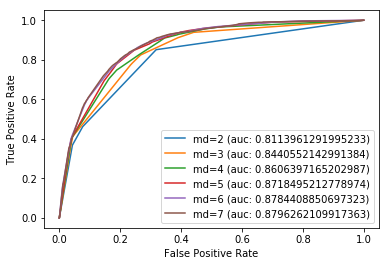

In [129]:
ds_r1 = roc_auc_score( y_tst, pred1[:, 1] )
ds_r2 = roc_auc_score( y_tst, pred2[:, 1] )
ds_r3 = roc_auc_score( y_tst, pred3[:, 1] )
ds_r4 = roc_auc_score( y_tst, pred4[:, 1] )
ds_r5 = roc_auc_score( y_tst, pred5[:, 1] )
ds_r6 = roc_auc_score( y_tst, pred6[:, 1] )
plt.plot( ds_fpr1, ds_tpr1, label = 'md=2 (auc: '+str(ds_r1)+')' )
plt.plot( ds_fpr2, ds_tpr2, label = 'md=3 (auc: '+str(ds_r2)+')' )
plt.plot( ds_fpr3, ds_tpr3, label = 'md=4 (auc: '+str(ds_r3)+')' )
plt.plot( ds_fpr4, ds_tpr4, label = 'md=5 (auc: '+str(ds_r4)+')' )
plt.plot( ds_fpr5, ds_tpr5, label = 'md=6 (auc: '+str(ds_r5)+')' )
plt.plot( ds_fpr6, ds_tpr6, label = 'md=7 (auc: '+str(ds_r6)+')' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

### Выбираем лучшую

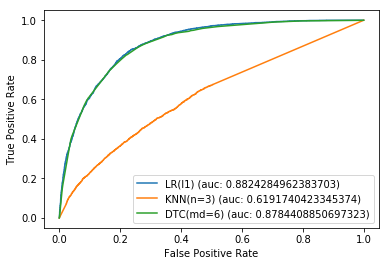

In [131]:
plt.plot( lr_fpr1, lr_tpr1, label = 'LR(l1) (auc: '+str(lr_r1)+')' )
plt.plot( kn_fpr2, kn_tpr2, label = 'KNN(n=3) (auc: '+str(kn_r2)+')' )
plt.plot( ds_fpr5, ds_tpr5, label = 'DTC(md=6) (auc: '+str(ds_r5)+')' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [132]:
print('Лучший результат: DTC(md=6) (auc: '+str(ds_r5)+')')

Лучший результат: DTC(md=6) (auc: 0.8784408850697323)
